In [58]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy import spatial
import matplotlib.pyplot as plt
from astropy.table import Table
import matplotlib.cm as cm
import emcee
import corner
import pdb

(a)

In [59]:
from sedpy import attenuation

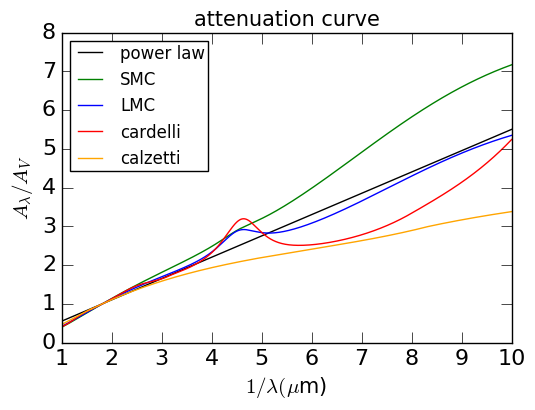

In [60]:
wav = np.arange(1000.0, 10000.0, 1)
pwl = attenuation.powerlaw(wav)
smc = attenuation.smc(wav)
lmc = attenuation.lmc(wav)
cardelli = attenuation.cardelli(wav)
calzetti = attenuation.calzetti(wav)

colors = ['k', 'g', 'b', 'r', 'orange']
lw = 1
plt.plot(1/wav*1e4, pwl, c=colors[0], ls='-', lw=lw, label='power law')
plt.plot(1/wav*1e4, smc, c=colors[1], ls='-', lw=lw, label='SMC')
plt.plot(1/wav*1e4, lmc, c=colors[2], ls='-', lw=lw, label='LMC')
plt.plot(1/wav*1e4, cardelli, c=colors[3], ls='-', lw=lw, label='cardelli')
plt.plot(1/wav*1e4, calzetti, c=colors[4], ls='-', lw=lw, label='calzetti')
plt.legend(loc='best', prop={'size':12})
plt.xlabel(r'$1/\lambda(\mu$m)')
plt.ylabel(r'$A_\lambda/A_V$')
plt.title('attenuation curve')

(b)

In [61]:
import fsps

In [62]:
fuv_filter = fsps.get_filter('galex_fuv')
fuv = fuv_filter.transmission
nuv_filter = fsps.get_filter('galex_nuv')
nuv = nuv_filter.transmission
sdssu_filter = fsps.get_filter('sdss_u')
sdssu = sdssu_filter.transmission
sdssg_filter = fsps.get_filter('sdss_g')
sdssg = sdssg_filter.transmission
sdssr_filter = fsps.get_filter('sdss_r')
sdssr = sdssr_filter.transmission
sdssi_filter = fsps.get_filter('sdss_i')
sdssi = sdssi_filter.transmission
sdssz_filter = fsps.get_filter('sdss_z')
sdssz = sdssz_filter.transmission

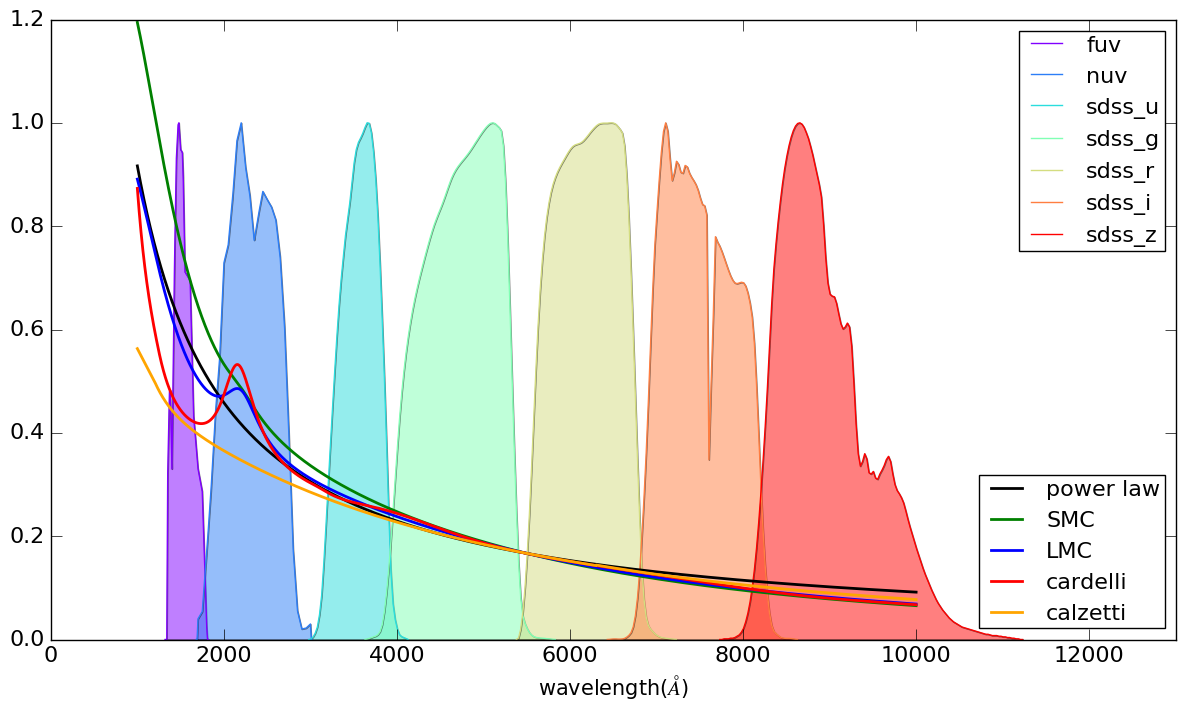

In [63]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 7))
trans_filter = [fuv, nuv, sdssu, sdssg, sdssr, sdssi, sdssz]
filter_name = ['fuv', 'nuv', 'sdss_u', 'sdss_g', 'sdss_r', 'sdss_i', 'sdss_z']

# plot transmission curves
plt.figure(figsize=(15,8))
trans_lines = []
for i in range(7):
    scale = np.max(trans_filter[i][1])
    l, = plt.plot(trans_filter[i][0], trans_filter[i][1]/scale, color=colors[i], label=filter_name[i])
    plt.fill_between(trans_filter[i][0], 0, trans_filter[i][1]/scale, facecolor=colors[i], alpha=0.5)
    trans_lines.append(l)
legend1= plt.legend(handles=trans_lines, loc=0)

# plot attenuation curve
colors = ['k', 'g', 'b', 'r', 'orange']
scale = 6
lw = 2
l1, = plt.plot(wav, pwl/scale, label='power law', ls='-', lw=lw, c=colors[0])
l2, = plt.plot(wav, smc/scale, label='SMC', ls='-', lw=lw, c=colors[1])
l3, = plt.plot(wav, lmc/scale, label='LMC', ls='-', lw=lw, c=colors[2])
l4, = plt.plot(wav, cardelli/scale, label='cardelli', ls='-', lw=lw,c=colors[3])
l5, = plt.plot(wav, calzetti/scale, label='calzetti', ls='-', lw=lw, c=colors[4])
ax = plt.gca().add_artist(legend1)
plt.legend(handles=[l1,l2, l3, l4, l5], loc='lower right')
plt.xlim(0,13000)
plt.xlabel('wavelength($\AA$)')

(c)

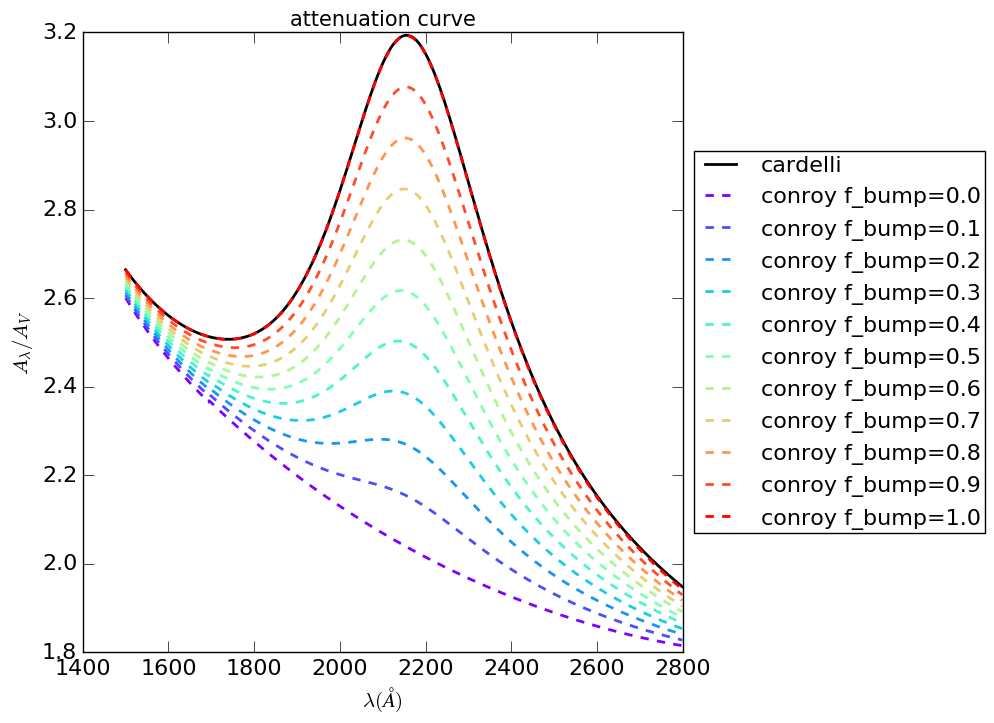

In [66]:
bump_frac = np.arange(0, 1.1, 0.1)
colors = cm.rainbow(np.linspace(0, 1, len(bump_frac)))
wav = np.arange(1500.0, 2800.0, 1)
cardelli = attenuation.cardelli(wav)
plt.figure(figsize=(8,8))
plt.plot(wav, cardelli, label='cardelli', ls='-', lw=2, c='k')
for i in range(len(bump_frac)):
    conroy = attenuation.conroy(wav, f_bump=bump_frac[i])
    plt.plot(wav, conroy, ls='--', c=colors[i], lw=2, label='conroy f_bump=%.1f' %bump_frac[i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(r'$\lambda(\AA)$')
plt.ylabel(r'$A_\lambda/A_V$')
plt.title('attenuation curve')

when bump fraction is 1, Conroy and Cardelli curves equal.

(d)

galex_nuv, wfc3_uvis_f218w, uvot_m2 will be useful for constraining bump fraction.

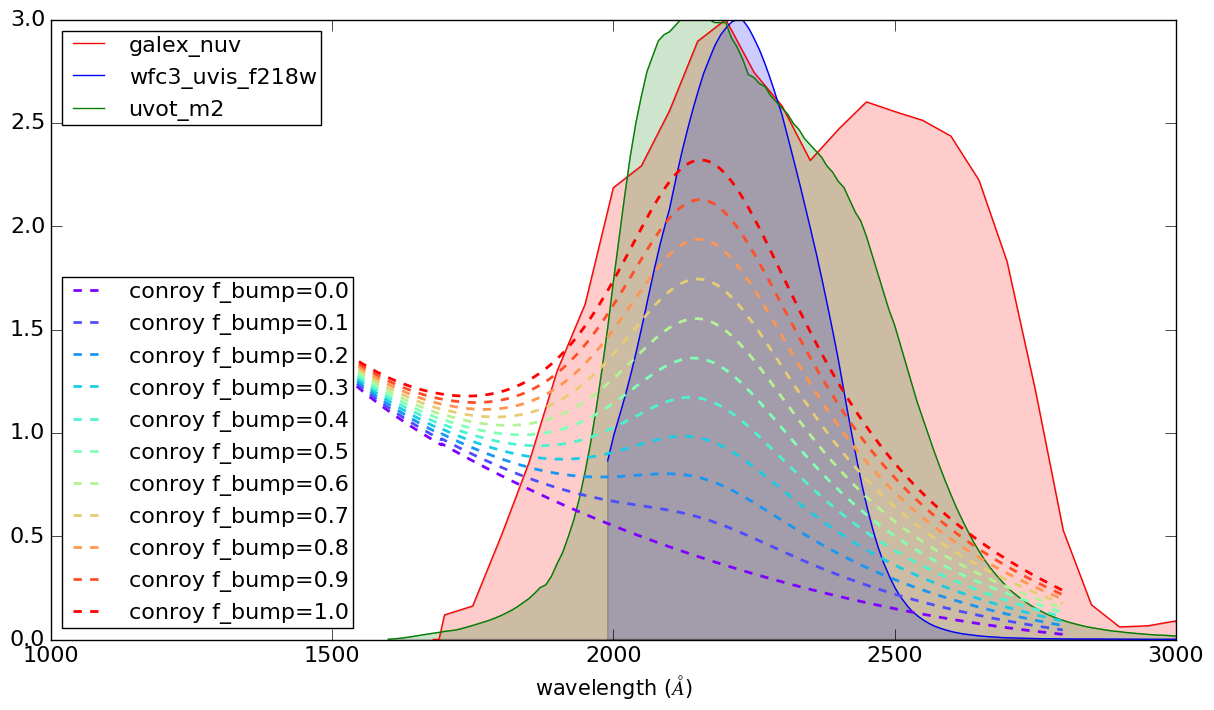

In [73]:
nuv_filter = fsps.get_filter('galex_nuv')
nuv = nuv_filter.transmission
f218_filter = fsps.get_filter('wfc3_uvis_f218w')
f218 = f218_filter.transmission
m2_filter = fsps.get_filter('uvot_m2')
m2= m2_filter.transmission

# plot transmission curves
colors = ['r', 'b', 'g']
plt.figure(figsize=(15,8))
scale = 3
l1, = plt.plot(nuv[0], nuv[1]/nuv[1].max()*scale, color=colors[0], label='galex_nuv')
plt.fill_between(nuv[0], 0, nuv[1]/nuv[1].max()*scale, facecolor=colors[0], alpha=0.2)
l2, = plt.plot(f218[0], f218[1]/f218[1].max()*scale, color=colors[1], label='wfc3_uvis_f218w')
plt.fill_between(f218[0], 0, f218[1]/f218[1].max()*scale, facecolor=colors[1], alpha=0.2)
l3, = plt.plot(m2[0], m2[1]/m2[1].max()*scale, color=colors[2], label='uvot_m2')
plt.fill_between(m2[0], 0, m2[1]/m2[1].max()*scale, facecolor=colors[2], alpha=0.2)
legend1= plt.legend(handles=[l1, l2, l3], loc='upper left')

#pdb.set_trace()
# plot the attenuation curve
lines = []
colors = cm.rainbow(np.linspace(0, 1, len(bump_frac)))
for i in range(len(bump_frac)):
    conroy = attenuation.conroy(wav, f_bump=bump_frac[i])
    l, = plt.plot(wav, (conroy-1.8)/0.6, ls='--', c=colors[i], lw=2, label='conroy f_bump=%.1f' %bump_frac[i])
    lines.append(l)
ax = plt.gca().add_artist(legend1)
legend2 = plt.legend(handles=lines, loc='lower left')
plt.xlim(1000, 3000)
plt.xlabel(r'wavelength ($\AA$)')